## Code Reference
This Notebook is code was taken from : https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/ and was adapted to illistrate the behaviour of SIR using differnt naming conventions and parameter values to show a range of examples. (last accessed 2023-12-05).

Illustrating the behavior of SIR system of differential equations to get an overview of compartment sizes with respect to time and the dynamics of compartmental models. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams.update({'font.size': 13})

Define SIR system of differential equations.

In [2]:
def sir(c, t, pi, pr): 
    S, I, R = c
    dSdt = -pi * S * I # The change in susceptible population over time.
    dIdt = (pi * S * I) - (pr * I) # The change in infected population over time.
    dRdt = pr * I # The change in recovered population over time.
    return [dSdt, dIdt, dRdt]

Initialise the compartment sizes.

In [3]:
# Size of Initial Compartments
I0 = 0.01 # 1% of the population is initially infected
S0 = 1 - I0 # 99% of the population is susceptible
R0 = 0 # No one is removed

# Create compartments
C0 = [S0, I0, R0] 

Set rates p_infect and p_remove to control rate of recovery and transmission respectively.

In [4]:
p_infect = 0.08
p_remove = 0.05

 Solve the SIR differential equations from time 0 to 500

In [5]:
t_max = 500
t = np.arange(0, t_max)

# Solve ODE (Ordinary Differential Equations)
compartments_overtime = odeint(sir, C0, t, args=(p_infect, p_remove)).T

# Unpack the individual compartments sizes over time
S, I, R = compartments_overtime

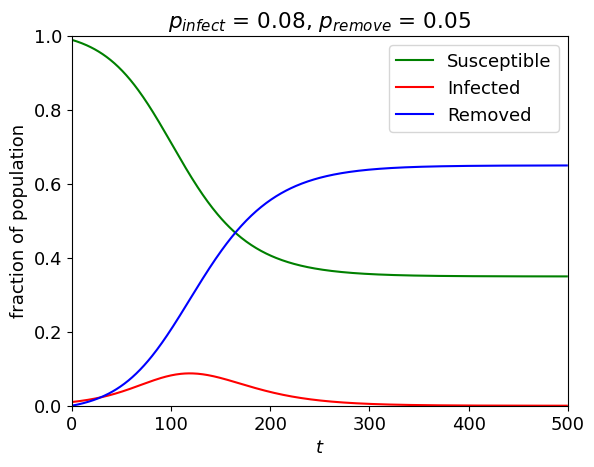

In [6]:
# Plot the data on three separate curves for S(t), I(t) and R(t) to highlight the dynamics of the system.

fig, ax = plt.subplots()
    
ax.plot(t, S, 'g-', label='Susceptible')
ax.plot(t, I , 'r-', label='Infected')
ax.plot(t, R, 'b-', label='Removed')

ax.set_title("$p_{infect}$ = " + str(p_infect) + ", $p_{remove}$ = " + str(p_remove))
ax.set_xlim([0, t_max])
ax.set_ylim([0, 1])
ax.legend() 
# ax.set_title("SIR system of differential equations\n$p_{remove}$=" + str(p_remove) + ", $p_{infect}$=" + str(p_infect))
ax.set_xlabel('$t$')
ax.set_ylabel("fraction of population")

fig.show()

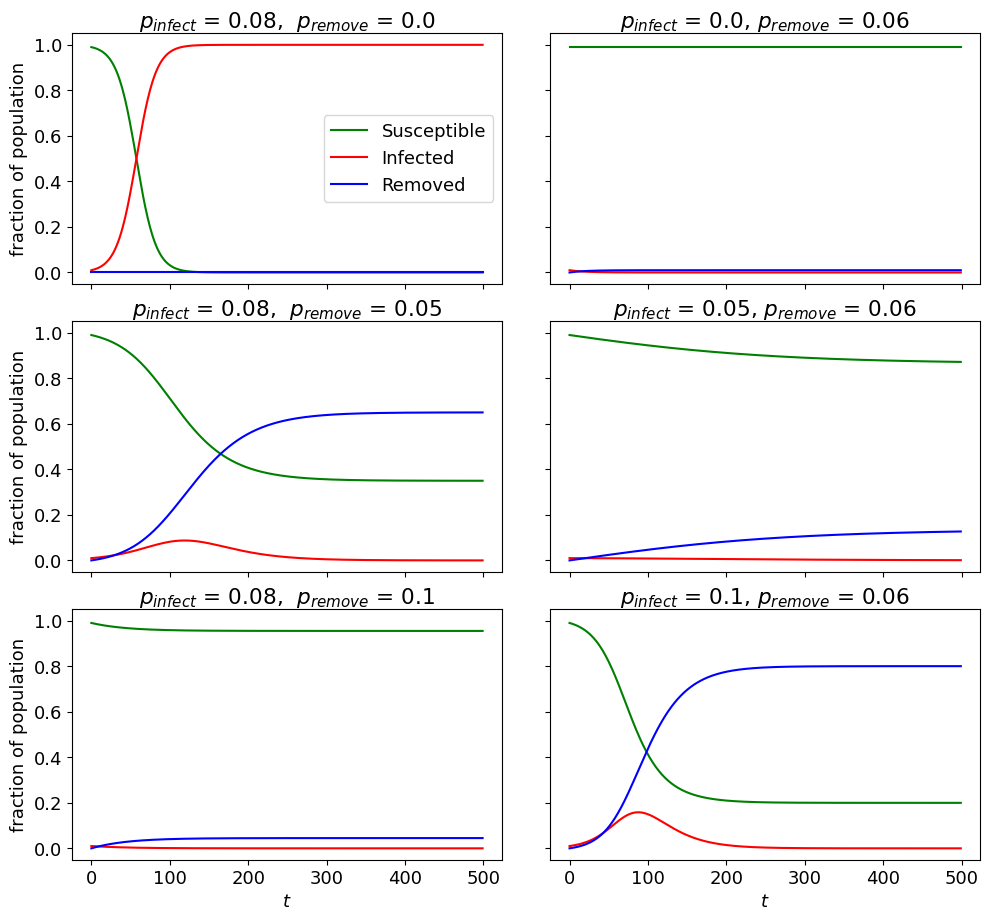

In [7]:
fig, axs = plt.subplots(3, 2,  sharex=True, sharey=True, figsize=(10,9))

fig.tight_layout()

p_removes = np.linspace(0, 0.1, 3)

p_infects = np.linspace(0, 0.1, 3)

for i, pr in enumerate(p_removes):
    compartments_overtime = odeint(sir, C0, t, args=(p_infect, pr)).T

    # Unpack the individual compartments sizes over time
    S, I, R = compartments_overtime

    axs[i][0].set_title("$p_{infect}$ = 0.08,  $p_{remove}$ = " + str(pr), y=0.99)


    axs[i][0].plot(t, S, 'g-', label='Susceptible')
    axs[i][0].plot(t, I , 'r-', label='Infected')
    axs[i][0].plot(t, R, 'b-', label='Removed')
    axs[i][0].set_ylabel("fraction of population")


for i, pi in enumerate(p_removes):
    compartments_overtime = odeint(sir, C0, t, args=(pi, p_remove)).T

    # Unpack the individual compartments sizes over time
    S, I, R = compartments_overtime

    axs[i][1].set_title("$p_{infect}$ = " + str(pi) + ", $p_{remove}$ = 0.06", y=0.99)
    axs[i][1].plot(t, S, 'g-', label='S')
    axs[i][1].plot(t, I , 'r-', label='I')
    axs[i][1].plot(t, R, 'b-', label='R')
axs[0][0].legend() 

axs[2][0].set_xlabel('$t$')
axs[2][1].set_xlabel('$t$')


_ = plt.show()